<a href="https://colab.research.google.com/github/dianakang/DIANA_Pandas/blob/master/Do_it_Pandas_3_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%EA%B3%BC_%EC%8B%9C%EB%A6%AC%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 판다스 데이터프레임과 시리즈

판다스의 데이터프레임과 시리즈는 많은 양의 데이터를 저장할 수 있을 뿐만 아니라 행과 열 단위로 원하는 데이터를 조작할 수 있는 다양한 속성과 메서드를 제공한다. 

이번 3단원에서는 데이터프레임과 시리즈에 대해 좀 더 자세히 알아보자!

## 3.1. 나만의 데이터 만들기

### 3.1.1. 시리즈 만들기

In [1]:
import pandas as pd
s = pd.Series(['banana', 42])
s

0    banana
1        42
dtype: object

위의 예시에서 볼 수 있듯이 보통 인덱스는 0부터 시작하지만, 시리즈를 생성할 때는 문자열을 인덱스로 지정할 수도 있다. 

문자열을 인덱스로 지정하려면 Series메서드의 index 인자를 통해 인덱스로 사용하고자 하는 문자열을 리스트에 담아 전달하면 된다.

In [2]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'])
print(s)

s = pd.Series(['Wes McKinney', 'Creator of Pandas'], index=['Person','Who'])
print(s)

0         Wes McKinney
1    Creator of Pandas
dtype: object
Person         Wes McKinney
Who       Creator of Pandas
dtype: object


### 3.1.2. 데이터프레임 만들기

데이터프레임을 만들기 위해서는 **딕셔너리를 DataFrame 클래스에 전달**해야한다.

In [3]:
friends = pd.DataFrame({
    'Name': ['Diana Kang', 'Mia Kim'],
    'Occupation': ['Data Analyst', 'Food Marketer'],
    'Born': ['Suwon','Seoul'],
    'Hobby': ['Making a video', 'Going to cafe'],
    'Age': [24, 23]}
    )
friends

,Name,Occupation,Born,Hobby,Age
0,Diana Kang,Data Analyst,Suwon,Making a video,24
1,Mia Kim,Food Marketer,Seoul,Going to cafe,23


시리즈와 마찬가지로 데이터프레임도 인덱스를 따로 지정하지 않으면 0부터 자동으로 생성한다.

인덱스를 따로 지정하려면 index 인자에 리스트를 전달하면 된다.

또 **columns 인자를 사용하면 데이터프레임의 열 순서를 지정**할 수 있다.

예를들어, 데이터프레임을 만들 때 Occupation, Born, Hobby, Age의 순서로 딕셔너리를 전달했어도 

columns 인자에 Occupation, Born, Age, Hobby의 순서로 열 이름을 전달하면 생성된 데이터프레임의 열 순서는 columns에 전달한 값을 따라간다.

In [4]:
friends = pd.DataFrame(
    data = {'Occupation': ['Data Analyst', 'Food Marketer'],
            'Born': ['Suwon','Seoul'],
            'Hobby': ['Making a video', 'Going to cafe'],
            'Age': [24, 23]},
    index =['Diana Kang', 'Mia Kim'],
    columns = ['Occupation','Born','Age','Hobby'])
friends

,Occupation,Born,Age,Hobby
Diana Kang,Data Analyst,Suwon,24,Making a video
Mia Kim,Food Marketer,Seoul,23,Going to cafe


데이터프레임을 딕셔너리로 만드는 방법도 있지만, **딕셔너리를 데이터의 순서를 보장하지 않는다.**

만약 순서가 보장된 딕셔너리를 전달하려면 **OrderedDict 클래스**를 사용해야한다. 

In [5]:
from collections import OrderedDict

friends = pd.DataFrame(OrderedDict([
    ('Name', ['Diana Kang', 'Seola Kim']),
    ('Occupation', ['Data Analyst', 'Teacher']),
    ('Born', ['1997-01-06', '1996-12-06']),
    ('Hobby', ['Making a video', 'Taking a nap']),
    ('Age', [24,24])
])
)
friends

,Name,Occupation,Born,Hobby,Age
0,Diana Kang,Data Analyst,1997-01-06,Making a video,24
1,Seola Kim,Teacher,1996-12-06,Taking a nap,24


## 3.2. 시리즈 다루기 - 기초

### 3.2.1. 데이터프레임에서 시리즈 선택하기

In [6]:
# friends 데이터프레임 준비하기
friends = pd.DataFrame(
    data = {'Occupation': ['Data Analyst', 'Food Marketer'],
            'Born': ['Suwon','Seoul'],
            'Hobby': ['Making a video', 'Going to cafe'],
            'Age': [24, 23]},
    index =['Diana Kang', 'Mia Kim'],
    columns = ['Occupation','Born','Hobby','Age'])

데이터프레임에서 시리즈를 선택하려면 loc속성에 인덱스를 전달하면 된다. 

정말 시리즈를 선택한 것인지 확인하기 위해 type으로 한 번 더 검사한다.

In [7]:
first_row = friends.loc['Diana Kang']
print(type(first_row))

<class 'pandas.core.series.Series'>


In [8]:
first_row

Occupation      Data Analyst
Born                   Suwon
Hobby         Making a video
Age                       24
Name: Diana Kang, dtype: object

! 여기서 주목해야 할 점은 데이터프레임을 만들 때 Age열에 정수형 리스트를 전달해도 시리즈를 출력해보면 시리즈의 자료형을 object(문자열)로 인식한다는 점이다.

### 3.2.2. 시리즈 속성과 메서드 사용하기 - index, values, keys

지난 2장에서 배운 loc, iloc 속성 외에도 시리즈에는 다양한 속성이 미리 정의되어 있다. 

이번 장에서는 index, values 속성과 keys 메서드에 대해 알아보겠다. 

#### (1) index 속성 사용하기

In [9]:
first_row.index

Index(['Occupation', 'Born', 'Hobby', 'Age'], dtype='object')

-> index 속성에는 시리즈의 인덱스가 들어있다.

In [12]:
first_row.index[0]

'Occupation'

#### (2) values 속성 사용하기

In [10]:
first_row.values

array(['Data Analyst', 'Suwon', 'Making a video', 24], dtype=object)

-> values 속성에는 시리즈의 데이터가 저장되어 있다.

#### (3) keys 메서드 사용하기

keys는 속성이 아니라 메서드이다. 

keys메서드는 index 속성과 같은 역할을 한다. 따라서 index 속성을 사용했을 때와 동일한 결과값을 얻을 수 있다.

In [11]:
first_row.keys()

Index(['Occupation', 'Born', 'Hobby', 'Age'], dtype='object')

In [13]:
first_row.keys()[0]

'Occupation'

### 3.2.3. 시리즈의 기초 통계 메서드 사용하기

시리즈에는 keys 메서드 외에도 다양한 메서드가 있다. 

이번에는 시리즈에 미리 정의되어 있는 mean, min, max, std 메서드의 사용 방법을 알아보겠다. 

In [14]:
ages = friends['Age']
ages

Diana Kang    24
Mia Kim       23
Name: Age, dtype: int64

만약 시리즈를 구성하는 데이터가 정수라면 mean, min, max, std와 같은 통계 메서드를 사용할 수 있다.

In [16]:
print(ages.mean())
print("----------")

print(ages.min())
print("----------")

print(ages.max())
print("----------")

print(ages.std())

23.5
----------
23
----------
24
----------
0.7071067811865476



# 시리즈 메서드 정리

*   append - 2개 이상의 시리즈 연결
*   describe - 요약 통계량 계산
*   drop_duplicates - 중복값이 없는 시리즈 반환
*   equals - 시리즈에 해당 값을 가진 요소가 있는지 확인
*   get_values - 시리즈 값 구하기(values 속성과 동일)
*   isin - 시리즈에 포함된 값이 있는지 확인
*   min - 최소값 반환
*   max - 최대값 반환
*   mean - 평균값 반환
*   median - 중간값 반환
*   replace - 특정 값을 가진 시리즈 값을 교체
*   sample - 시리즈에서 임의의 값을 반환
*   sort_values - 값을 정렬
*   to_frame - 시리즈를 데이터프레임으로 변환



## 3.3. 시리즈 다루기 - 응용

### 3.3.1. 시리즈와 불린 추출

2장에서는 원하는 데이터를 추출할 때 특정 인덱스를 지정하여 추출했다. 

하지만 보통 추출할 데이터의 정확한 인덱스를 모르는 경우가 더 많다. 

이러한 경우에 사용하는 방법이 **'불린 추출'**이다.

**불린 추출은 특정 조건을 만족하는 값만 추출**할 수 있다.

In [33]:
# 데이터 불러오기
scientists = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists.csv')

In [34]:
# 통계 수치 이용 불린 추출
ages = scientists['Age']
print(ages.max())
print(ages.mean())

90
59.125


In [35]:
# 평균 나이보다 나이 많은 사람 데이터 불린 추출
print(ages[ages > ages.mean()])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64


In [36]:
print(ages > ages.mean())
print(type(ages>ages.mean()))

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool
<class 'pandas.core.series.Series'>


위의 결과를 살펴보면 1,2,3,7의 인덱스 데이터가 참(True)라는 것을 알 수 있다. 

즉, **리스트 형태로 참이나 거짓을 담아 시리즈에 전달하면 참인 인덱스의 데이터만 추출**할 수 있다.

이것을 **'불린 추출'**이라고 한다.

In [37]:
manual_bool_values = [True,True,False,False,True,True,False,True]
print(ages[manual_bool_values])

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


### 3.3.2. 시리즈와 브로드캐스팅

앞서 살펴본 바에 따르면, ages > ages.mean()의 결과값의 개수는 여러 개이다.

이렇게 시리즈나 데이터프레임에 있는 모든 데이터에 대해 한 번에 연산하는 것을 **'브로드캐스팅(Broadcasting)'**이라고 한다. 

그리고 시리즈처럼 여러 개의 값을 가진 데이터를 **'벡터'**라고 하고, 단순 크기를 나타내는 데이터를 **'스칼라'**라고 한다. 



#### (1) 벡터와 스칼라로 브로드캐스팅

In [38]:
# 벡터와 스칼라로 브로드캐스팅 수행하기 - 덧셈
print(ages+ages)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [39]:
# 벡터와 스칼라로 브로드캐스팅 수행하기 - 곱셈
print(ages * ages)

0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64


#### (2) 벡터에 스칼라 연산

In [40]:
# 벡터에 스칼라를 연산
print(ages + 100)
print(ages * 2)

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


#### (3) 길이가 서로 다른 벡터 연산

In [41]:
# 길이가 서로 다른 벡터 연산
print(pd.Series([1,100]))
print(ages + pd.Series([1,100]))

0      1
1    100
dtype: int64
0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


위의 예시는 데이터 개수가 2개인 시리즈와 8개인 시리즈를 더한 것이다.

결과값을 살펴보면 인덱스가 일치한 0,1만 계산했다는 것을 알 수 있다.

나머지 인덱스(2~7)는 계산을 할 수 없기 때문에 누락값(NaN)으로 처리한다.

#### (4) sort_index 사용

In [42]:
# sort_index 메서드 사용
rev_ages = ages.sort_index(ascending=False)  ## ascending=False -> 인덱스 역순으로 정렬
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

#### (5) 벡터 연산 (순서대로 정렬 + 역순으로 정렬 연산하기)

In [43]:
# ages와 rev_ages 연산
print(ages * 2)
print(ages + rev_ages)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


인덱스의 순서대로 정렬된 **ages와** 인덱스의 역순으로 정렬된 **rev_ages를 연산**하면 **ages * 2**를 한 결과값과 **동일**하게 나온다. 

ages의 인덱스(0-7)와 rev_age의 **인덱스**(0-7)**가 일치하는 값끼리 연산**했기 때문이다. 

(! 헷갈리기 쉬운데, ages의 데이터와 rev_ages의 데이터를 순서대로 더하는 것이 아님에 주의하자!)

**벡터와 벡터의 연산은 일치하는 인덱스의 값끼리 수행한다는 것을 잊지말자!**

## 3.4. 데이터프레임 다루기

데이터프레임도 시리즈와 마찬가지로 불린 추출과 브로드캐스팅을 할 수 있다.



### 3.4.1. 불린 추출

In [44]:
print(scientists[scientists['Age']>scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


다음은 데이터프레임의 Age 열에서 Age 열의 평균보다 높은 행만 출력한 것이다.

In [49]:
print(scientists.loc[[True,True,False,True,True,True,False,True]])

                Name        Born        Died  Age     Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37        Chemist
1     William Gosset  1876-06-13  1937-10-16   61   Statistician
3        Marie Curie  1867-11-07  1934-07-04   66        Chemist
4      Rachel Carson  1907-05-27  1964-04-14   56      Biologist
5          John Snow  1813-03-15  1858-06-16   45      Physician
7       Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


우리는 시리즈에서 리스트로 True, False를 전달하여 데이터를 추출했다. 이렇게 참, 거짓을 담은 리스트를 bool 벡터라고 부른다. 


---


!!유의사항!!

교재에 나와있는 것처럼 print(scientists.loc[[True, True, False, True]])를 출력하면

IndexError: Boolean index has wrong length: 4 instead of 8

위와 같은 오류가 뜬다.  


---



해결방안은 크게 두 가지가 있는데, 

첫번째 방법)

1번째 예제 실행시 bool연산으로 추출한 결과를 다른 변수로 저장한 후, 예제2처럼 bool list 4개를 입력한다.

두번째 방법)

scientists변수를 그대로 사용할 거라면, bool list를 8개로 입력해줘야 정상적으로 실행이 된다.

(필자는 두번째 방법을 선택했다!)



### 3.4.2. 브로드캐스팅

앞에서 시리즈에 스칼라 연산을 적용할 때는 모든 요소에 스칼라를 적용하여 연산했다. 데이터프레임도 마찬가지이다.

scientists 데이터프레임에 2를 곱하면 정수 데이터는 2를 곱한 숫자가 되고, *문자열 데이터는 문자열이 2배로 늘어난다.*

In [52]:
scientists * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


## 3.5. 시리즈와 데이터프레임의 데이터 처리하기

### 3.5.1. 열의 자료형 바꾸기와 새로운 열 추가하기

지금까지 시리즈와 데이터프레임에서 데이터를 추출하는 방법을 알아보았다.

그럼 이제 시리즈와 데이터프레임에 있는 데이터를 처리하는 방법을 알아보자!

In [53]:
# scientists 데이터프레임의 Born과 Died 열의 자료형 확인
print(scientists['Born'].dtype)
print(scientists['Died'].dtype)

object
object


-> 타입을 확인해보니 각각의 자료형은 문자열(object)이다.



---


**날짜 데이터**는 시간 관련 작업을 할 수 있도록 **datetime 자료형**으로 바꿔주는 것이 좋다. 

위의 코드처럼 열의 자료형을 datetime이라는 자료형으로 바꾼 다음(.to_datetime 속성 이용),

format 속성을 '%Y-%m-%d'로 지정하여 날짜 형식을 지정한다.

In [54]:
born_datetime = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
print(born_datetime)

died_datetime = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')
print(died_datetime)

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


위의 과정에서 데이터의 자료형을 datetime으로 바꿔 born_datetime, died_datetime에 저장했으니

이제 데이터프레임에 각각의 값을 새로운 열로 추가해보겠다.


In [56]:
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)
print(scientists.head())
print(scientists.shape)

                   Name        Born  ...    born_dt    died_dt
0     Rosaline Franklin  1920-07-25  ... 1920-07-25 1958-04-16
1        William Gosset  1876-06-13  ... 1876-06-13 1937-10-16
2  Florence Nightingale  1820-05-12  ... 1820-05-12 1910-08-13
3           Marie Curie  1867-11-07  ... 1867-11-07 1934-07-04
4         Rachel Carson  1907-05-27  ... 1907-05-27 1964-04-14

[5 rows x 7 columns]
(8, 7)


shape 속성으로 데이터프레임의 형태를 살펴보면 (8,5)에서 (8,7)로 2개의 열이 추가되었다는 것을 확인할 수 있다.

In [57]:
scientists['age_days_dt'] = (scientists['died_dt'] - scientists['born_dt'])
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


이렇게 died_dt 열에서 born_dt를 빼면 과학자가 얼마동안 세상을 살다가 떠났는지 계산할 수 있다. 

### 3.5.2. 시리즈, 데이터프레임의 데이터 섞기

In [59]:
# Age 값 출력하기
scientists['Age']

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [60]:
# Age열 데이터 섞기
import random

random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age'])

0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64


/usr/lib/python3.7/random.py:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]




1.   먼저 random 라이브러리를 불러온다.
2.   그리고 나서 random 라이브러리의 shuffle 메서드를 이용하여 데이터를 섞어준다.


---

-> 결과적으로 Age 열을 출력해보면 인덱스 0-7에 해당하는 값이 잘 섞여 있음을 알 수 있다.




### 3.5.3. 데이터프레임의 열 삭제하기

In [61]:
# scientists 데이터프레임의 열 확인하기
scientists.columns

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')

In [62]:
scientists_dropped = scientists.drop(['Age'], axis=1)
scientists_dropped.columns

Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')

데이터프레임에서 **열**을 **삭제**하려면 데이터프레임의 **drop메서드**를 사용해야 한다. 

**drop메서드의 첫번째 인자에 열 이름을 리스트에 담아 전달**하고, **두번째 인자에 axis=1을 전달**하면 열을 삭제할 수 있다. 

+ 참고로 axis=1은 열이고, axis=0은 행이다.


## 3.6. 데이터 저장하고 불러오기

지금까지 데이터를 추출하고 처리하는 '데이터 가공처리'를 배워보았다.

이렇게 잘 가공한 데이터는 안전하게 보관해야 다음에 또 사용할 수 있다. 

판다스는 데이터를 저장하는 다양한 방법을 제공하는데,

먼저 가공한 데이터를 피클, CSV, TSV 파일로 저장하고 다시 불러오는 방법을 살펴보자.

### 3.6.1. 피클(pickle)로 저장하기

피클은 데이터를 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법이다. 

피클로 저장하면 스프레드시트보다 더 작은 용량으로 데이터를 저장할 수 있어 매우 편리하다.

시리즈를 피클로 저장하려면 to_pickle 메서드를 사용하면 되는데, 이때 저장 경로를 문자열로 전달해야 한다.


In [63]:
names = scientists['Name']
names.to_pickle('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists_names_series_pickle')

In [64]:
scientists.to_pickle('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists_df.pickle')



*   바이너리 형태 설명

(출처 : https://m.blog.naver.com/PostView.nhn?blogId=tipsware&logNo=221353023593&proxyReferer=https:%2F%2Fwww.google.com%2F)


*   pickle 코드 예시

(출처 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html)




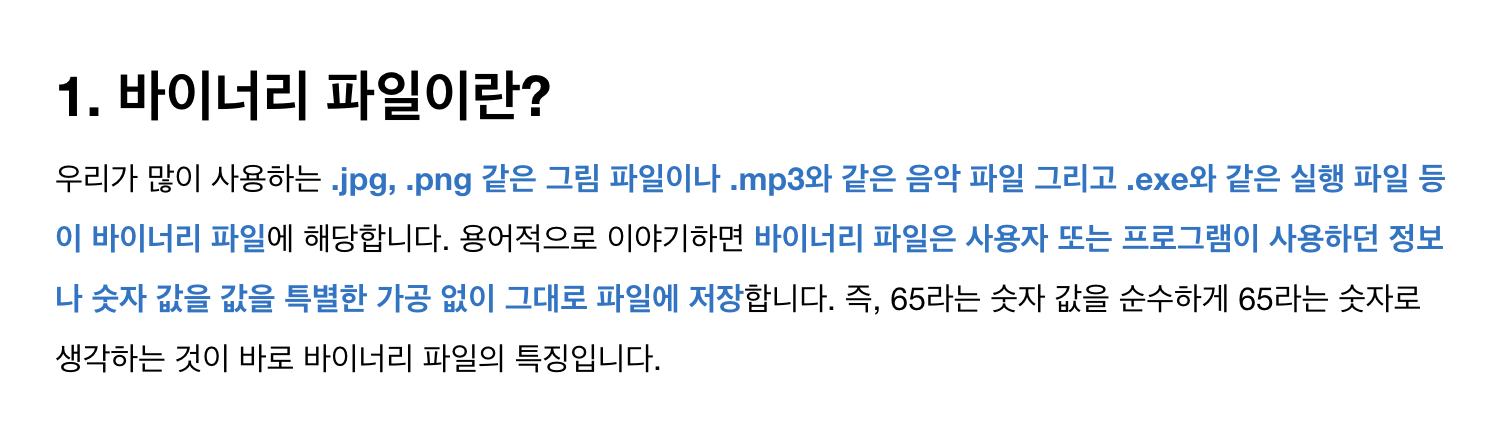

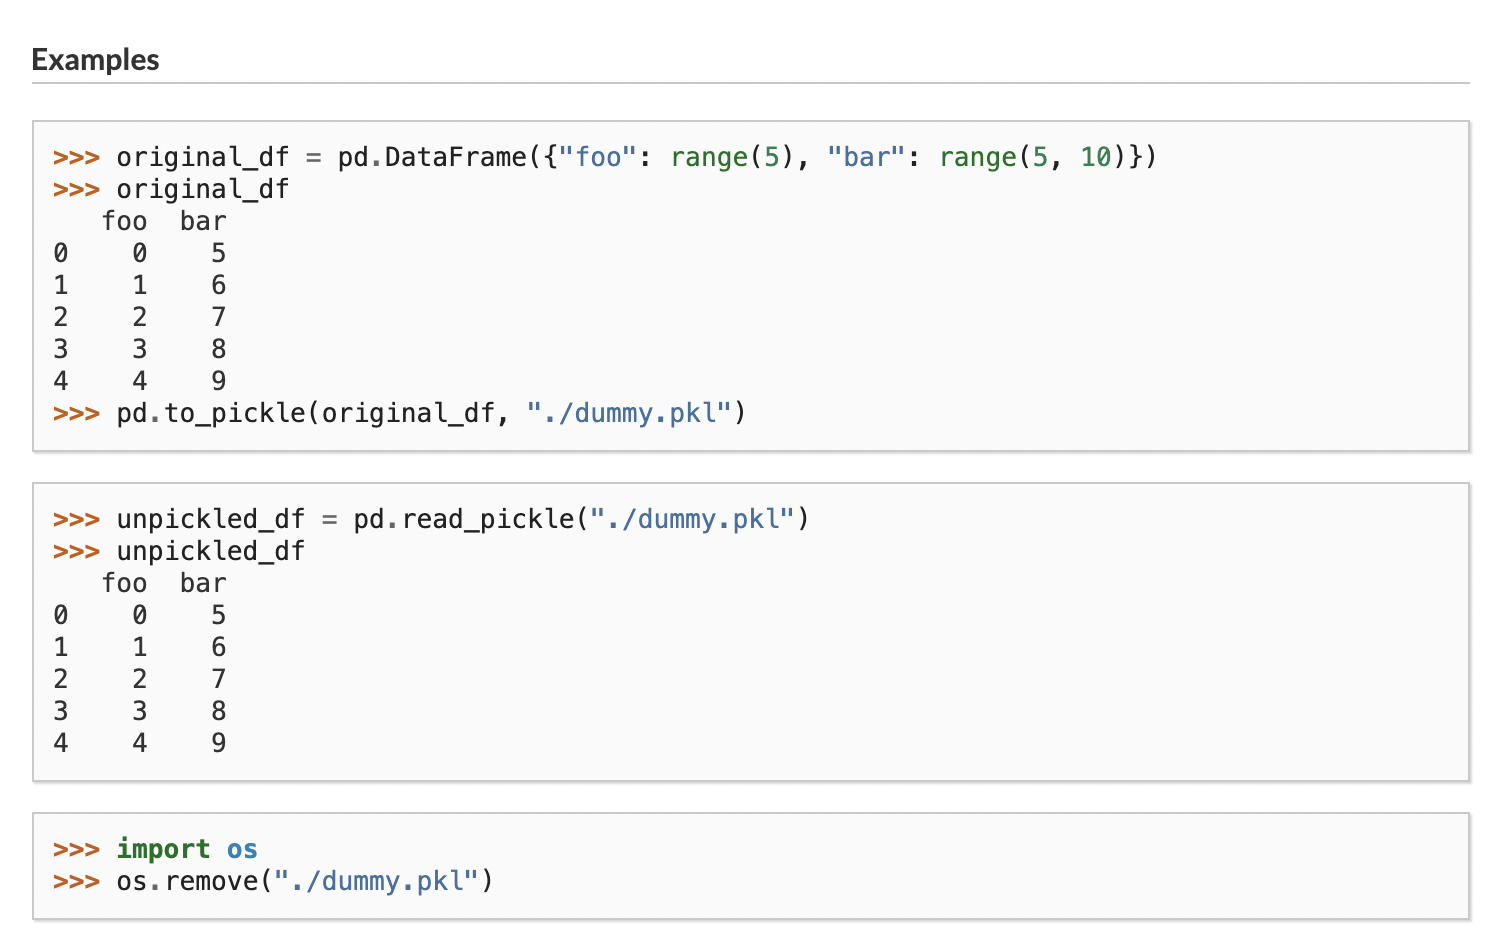

피클(pickle)은 바이너리 형태의 object이기 때문에 저장된 피클 데이터를 편집기와 같은 프로그램으로 열어보면 이상한 문자가 나타난다.

따라서 피클 데이터는 반드시 read_pickle 메서드로 읽어 들여야 한다.


### 3.6.2. CSV파일과 TSV파일로 저장하기



*   CSV 파일 - 데이터를 쉼표(,)로 구분하여 저장한 파일
*   TSV 파일 - 데이터를 탭(tab)으로 구분하여 저장한 파일

---


to_csv 메서드로 시리즈와 데이터프레임을 CSV 파일로 저장할 수 있다.

이때 sep 인자를 추가하여 '\t'를 지정하고 파일의 확장자를 '.tsv'로 지정하면 TSV 파일로 저장할 수 있다.


In [65]:
names.to_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientist_names_series.csv')
scientists.to_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists_df.tsv', sep='\t')

### 3.6.3. 시리즈와 데이터프레임을 엑셀 파일로 저장하기

시리즈는 엑셀 구조와 맞지 않기 때문에 엑셀 파일로 저장할 수 없다.

따라서 '시리즈 -> 데이터프레임으로 변환(to_frame메서드 사용)' 후 엑셀로 저장해야한다.

데이터프레임을 .xls로 저장하기 위해서는 xlwt 라이브러리가 필요하고
.xlsx로 저장하기 위해서는 openpyxl 라이브러리를 설치해야한다.




---


*   .xls -> 엑셀 2003 이하 버전에서 저장한 파일
*   .xlsx -> 엑셀 2007 이상 버전에서 저장한 파일




In [69]:
# 코랩을 사용하면 이러한 설치는 필요없다.

# pip install xlwt
# pip install openpyxl

In [71]:
# 시리즈를 데이터프레임으로 변환 후, 엑셀파일(.xls, .xlsx)로 저장
names_df = names.to_frame()   ## 시리즈를 데이터프레임으로 변환

import xlwt
names_df.to_excel('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists_names_series_df.xls')

import openpyxl
names_df.to_excel('/content/drive/MyDrive/pandas/doit_pandas-master/data/scientists_names_series_df.xlsx')